# SPAM Dectection using Support Vector Machines

## Setup

<p>Add intelex accelerator to speed up SVM algorithm</p>

In [41]:
#!pip install scikit-learn-intelex

In [42]:
#import sklearnx
#patch_sklearn()

### Imports

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

### File Structure Constants

In [2]:
FOLDER_DS1 = "Datasets/glasses-and-coverings/"
FOLDER_DS2 = "Datasets/glasses-and-noglasses/"
FOLDER = "Datasets/combined_datasets/"
# folders within glasses-and-covering
covering = "covering"
glasses_ds1 = "glasses_ds1"
plain = "plain"
sunglasses = "sunglasses"
sunglasses_imagenet = "sunglasses-imagenet"
# folder within glasses-and-noglasses
glasses_ds2 = "glasses_ds2"
no_glasses = "no_glasses"
#Combined dataset
glasses ='glasses'

#### Check paths are correct

In [45]:
pth = os.path.join(FOLDER_DS2,glasses_ds2)
print(os.listdir(pth))

['face-10.jpg', 'face-100.jpg', 'face-1001.jpg', 'face-1002.jpg', 'face-1003.jpg', 'face-1005.jpg', 'face-1006.jpg', 'face-1008.jpg', 'face-101.jpg', 'face-1011.jpg', 'face-1012.jpg', 'face-1013.jpg', 'face-1014.jpg', 'face-1017.jpg', 'face-1023.jpg', 'face-1029.jpg', 'face-103.jpg', 'face-1030.jpg', 'face-1031.jpg', 'face-1033.jpg', 'face-1034.jpg', 'face-1039.jpg', 'face-1040.jpg', 'face-1042.jpg', 'face-1044.jpg', 'face-1045.jpg', 'face-1046.jpg', 'face-1047.jpg', 'face-1049.jpg', 'face-1052.jpg', 'face-1053.jpg', 'face-1056.jpg', 'face-1061.jpg', 'face-1064.jpg', 'face-1066.jpg', 'face-1068.jpg', 'face-1069.jpg', 'face-107.jpg', 'face-1070.jpg', 'face-1071.jpg', 'face-1074.jpg', 'face-1076.jpg', 'face-1080.jpg', 'face-1082.jpg', 'face-1083.jpg', 'face-1086.jpg', 'face-1087.jpg', 'face-1088.jpg', 'face-1089.jpg', 'face-109.jpg', 'face-1091.jpg', 'face-1092.jpg', 'face-1096.jpg', 'face-1097.jpg', 'face-1098.jpg', 'face-1099.jpg', 'face-1100.jpg', 'face-1101.jpg', 'face-1104.jpg', 'fa

## Data Exploration

<p>Inner folder names</p>

In [46]:
# Folders we are interested in
folder_ds1 = [glasses_ds1,plain,sunglasses,sunglasses_imagenet]
folder_ds2 = [glasses_ds2, no_glasses]
folder_combined = [glasses]
pth = os.path.join(FOLDER_DS2,folder_ds2[0])
print(os.listdir(pth))

['face-10.jpg', 'face-100.jpg', 'face-1001.jpg', 'face-1002.jpg', 'face-1003.jpg', 'face-1005.jpg', 'face-1006.jpg', 'face-1008.jpg', 'face-101.jpg', 'face-1011.jpg', 'face-1012.jpg', 'face-1013.jpg', 'face-1014.jpg', 'face-1017.jpg', 'face-1023.jpg', 'face-1029.jpg', 'face-103.jpg', 'face-1030.jpg', 'face-1031.jpg', 'face-1033.jpg', 'face-1034.jpg', 'face-1039.jpg', 'face-1040.jpg', 'face-1042.jpg', 'face-1044.jpg', 'face-1045.jpg', 'face-1046.jpg', 'face-1047.jpg', 'face-1049.jpg', 'face-1052.jpg', 'face-1053.jpg', 'face-1056.jpg', 'face-1061.jpg', 'face-1064.jpg', 'face-1066.jpg', 'face-1068.jpg', 'face-1069.jpg', 'face-107.jpg', 'face-1070.jpg', 'face-1071.jpg', 'face-1074.jpg', 'face-1076.jpg', 'face-1080.jpg', 'face-1082.jpg', 'face-1083.jpg', 'face-1086.jpg', 'face-1087.jpg', 'face-1088.jpg', 'face-1089.jpg', 'face-109.jpg', 'face-1091.jpg', 'face-1092.jpg', 'face-1096.jpg', 'face-1097.jpg', 'face-1098.jpg', 'face-1099.jpg', 'face-1100.jpg', 'face-1101.jpg', 'face-1104.jpg', 'fa

<p>Create function to explore data</p>

In [47]:
from collections import defaultdict

#Create function to explore datasets
def getfolderinfo(FOLDER_PATH,folders):
    # Define a default dict to store folder properties
    folder_info = defaultdict(dict)
    for folder in folders:
        path = os.path.join(FOLDER_PATH, folder)
        length = len(os.listdir(path))
        folder_info[folder]['length'] = length
        suffix_count = defaultdict(int)
        not_image = 0
        # Check files in folder
        for img in os.listdir(path):
            # Check suffix
            suffix = img.split('.')[-1]
            # Define these suffix as valid image files
            if suffix.lower() in ['jpg', 'jpeg', 'png', 'gif']:
                suffix_count[suffix] += 1
            else:
                not_image += 1

            # Save folder info            
            folder_info[folder]['suffix_frequency'] = suffix_count
            folder_info[folder]['not_image'] = not_image

    return folder_info

   

<p>Execute function on dataset folders</p>

In [48]:
folder_info_ds1 = getfolderinfo(FOLDER_DS1,folder_ds1)
folder_info_ds2 = getfolderinfo(FOLDER_DS2, folder_ds2)

### Glasses-and-coverings dataset

<p>Visualise results.<br>These results shows that the dataset is balanced in terms of numbers of images so there is not imbalance in the data which not cause bias.</p>

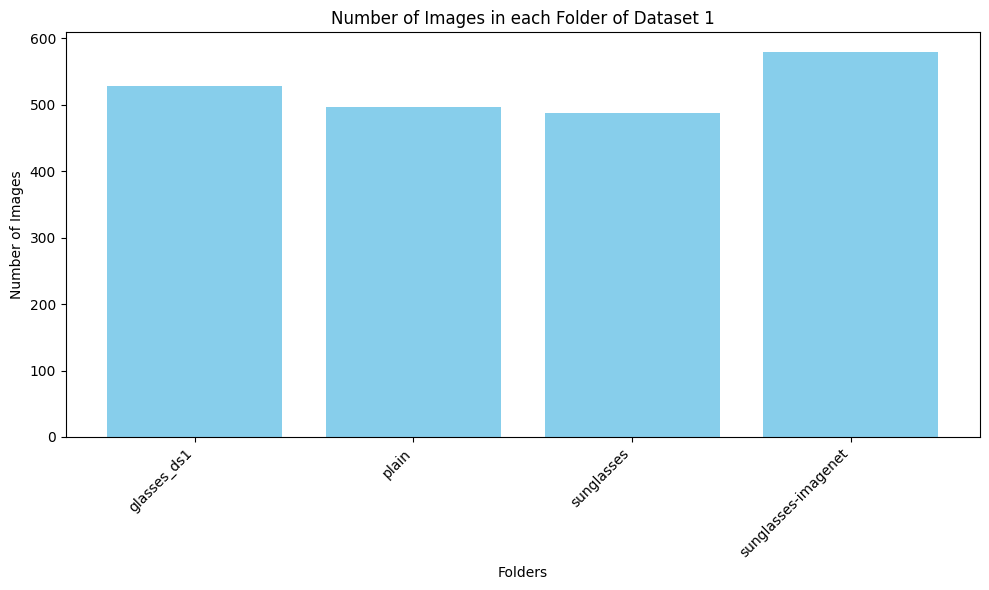

In [49]:
keys = list(folder_info_ds1.keys())
num_images = [folder_info_ds1[folder]['length'] for folder in keys]

plt.figure(figsize=(10, 6))
plt.bar(keys, num_images, color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in each Folder of Dataset 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<p> All files in folders are images with most files being jpg in this dataset with small exception. This should cause no problems going forward.</p>

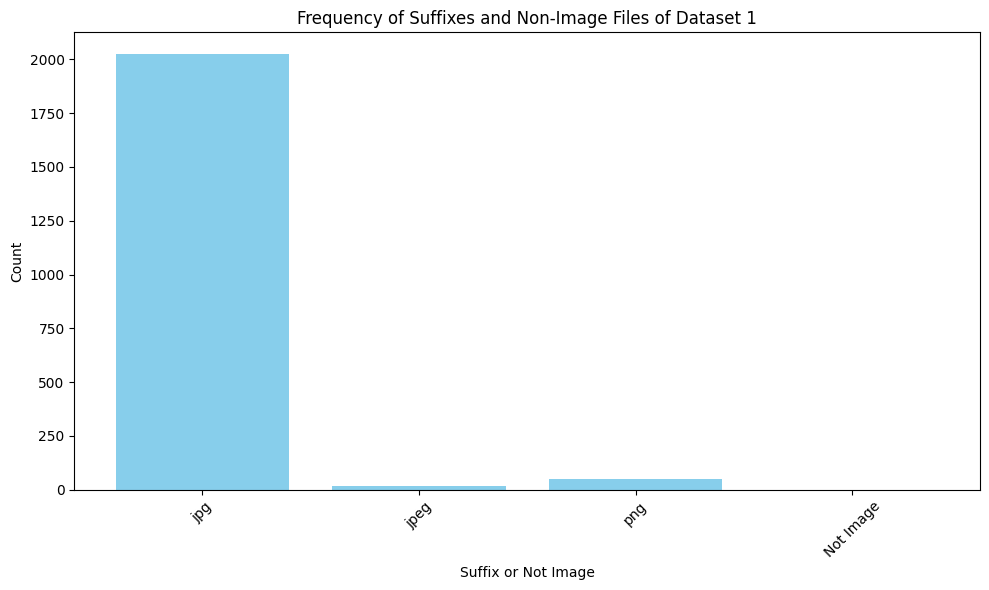

In [50]:
not_image_count = 0

suffix_counts = defaultdict(int)
not_image_count = 0

for folder_data in folder_info_ds1.values():
    suffix_info = folder_data['suffix_frequency']
    for suffix, count in suffix_info.items():
        suffix_counts[suffix] += count
    not_image_count += folder_data['not_image']

suffix_labels = list(suffix_counts.keys())
suffix_freqs = list(suffix_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(suffix_labels, suffix_freqs, color='skyblue')
plt.bar('Not Image', not_image_count, color='lightgreen')
plt.xlabel('Suffix or Not Image')
plt.ylabel('Count')
plt.title('Frequency of Suffixes and Non-Image Files of Dataset 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Glasses-and-noglasses dataset

<p>Visualise results<br>
Dataset is fairly balanced with a slight bias towards images with glasses with the difference about 16%. This may cause a slight bias but these datasets will be combined so the variance can be rechecked then.</p>

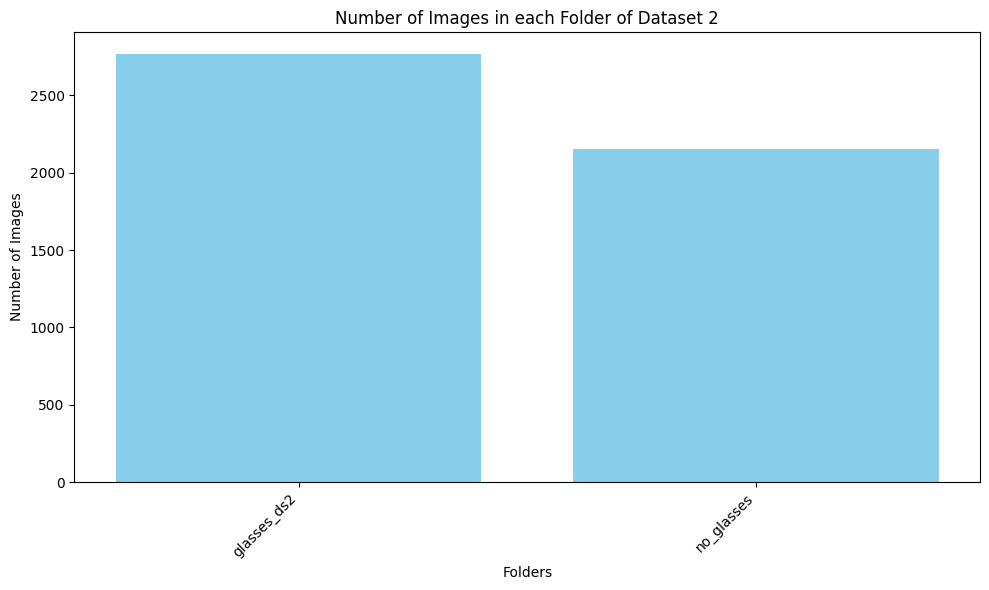

In [51]:
folders = list(folder_info_ds2.keys())
num_images = [folder_info_ds2[folder]['length'] for folder in folders]

plt.figure(figsize=(10, 6))
plt.bar(folders, num_images, color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in each Folder of Dataset 2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<p> All files in folders are images with all files being jpg in this dataset. This should cause no problems going forward.</p>

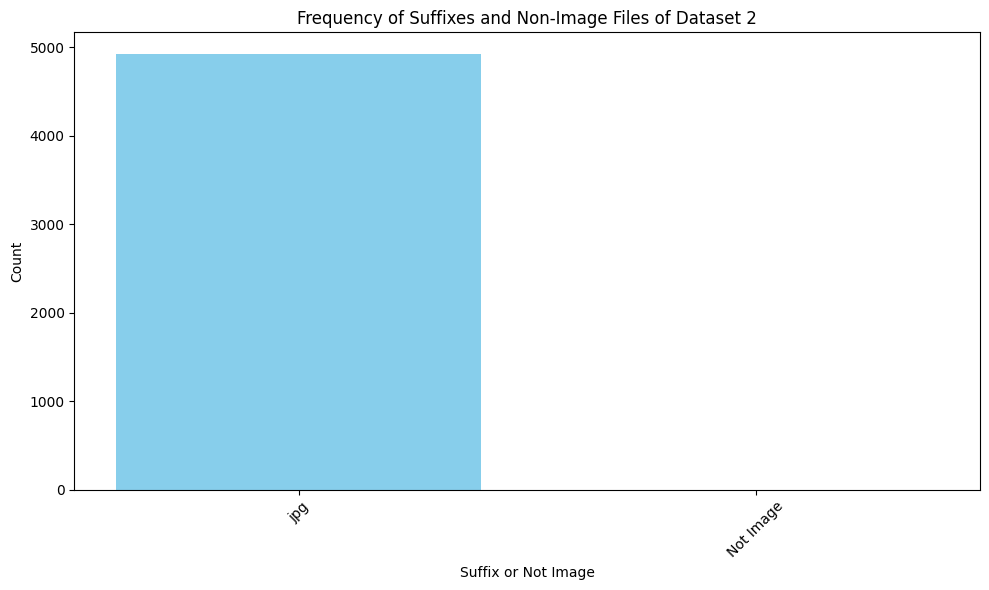

In [52]:
not_image_count = 0

suffix_counts = defaultdict(int)
not_image_count = 0

for folder_data in folder_info_ds2.values():
    suffix_info = folder_data['suffix_frequency']
    for suffix, count in suffix_info.items():
        suffix_counts[suffix] += count
    not_image_count += folder_data['not_image']

suffix_labels = list(suffix_counts.keys())
suffix_freqs = list(suffix_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(suffix_labels, suffix_freqs, color='skyblue')
plt.bar('Not Image', not_image_count, color='lightgreen')
plt.xlabel('Suffix or Not Image')
plt.ylabel('Count')
plt.title('Frequency of Suffixes and Non-Image Files of Dataset 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Combined dataset

In [4]:
folders = [plain, glasses, sunglasses]

<p>Visualise results<br>
Combining these datasets leads to a large imbalance in numbers of images with sunglasses. This has the potential to bias the model against the sunglasses class. To rectify, when creating training data, we could take all images from sunglasses and equal images from glasses and plain.</p>

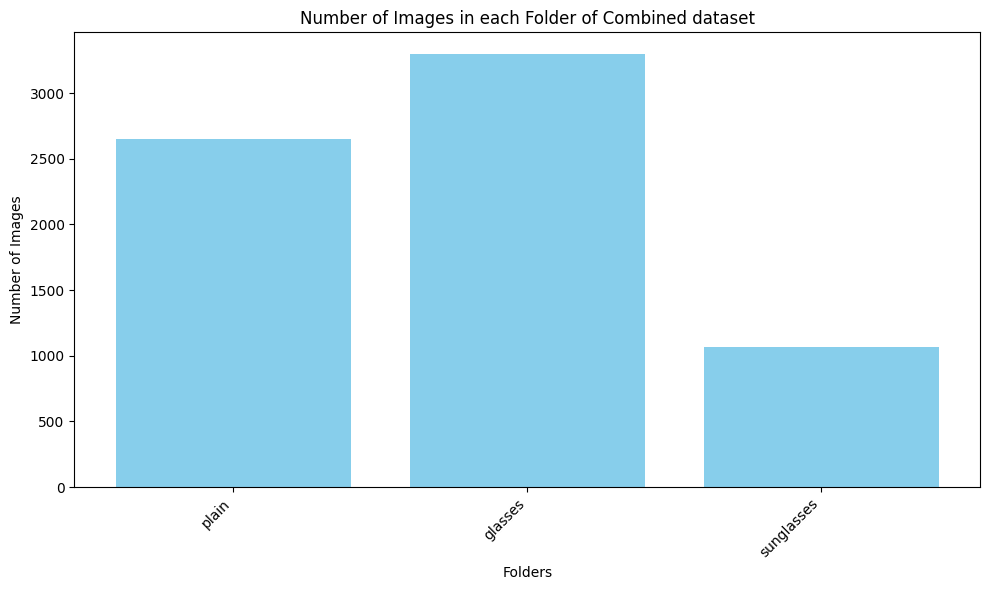

In [54]:
combined_size = []
for folder in folders:
    path = os.path.join(FOLDER, folder)
    length = len(os.listdir(path))
    combined_size.append(length)

plt.figure(figsize=(10, 6))
plt.bar(folders, combined_size, color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in each Folder of Combined dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<p>Sample Images</p>

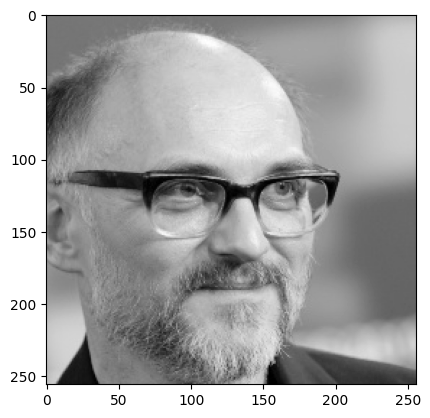

In [55]:
lists = os.listdir(os.path.join(FOLDER,'glasses'))
pth = os.path.join(FOLDER,'glasses', lists[0])
img_array = cv2.imread(pth, cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
plt.imshow(img_array, cmap="gray")

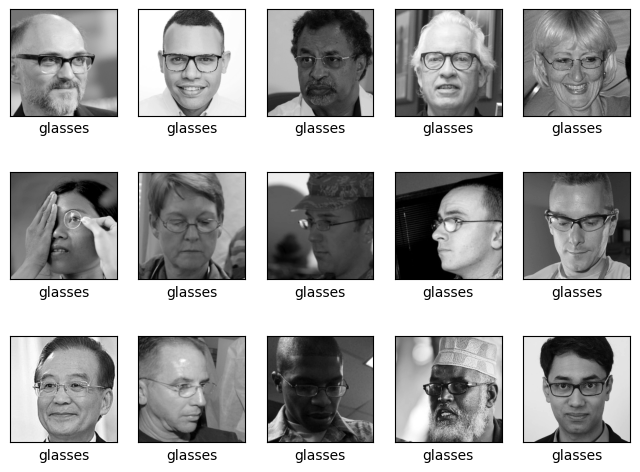

In [56]:
fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    lists = os.listdir(os.path.join(FOLDER,'glasses'))
    pth = os.path.join(FOLDER,'glasses', lists[i])
    img_array = cv2.imread(pth, cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    axi.imshow(img_array, cmap="gray")
    axi.set(xticks=[], yticks=[],
            xlabel='glasses')

## Data Preprocessing

<p>Define labels</p>

In [5]:
labels = [ glasses, plain, sunglasses]

<p>Create function to process images to training data<p>

In [58]:
##Reading all the images and converting to array for data and labels

def create_training_data(FOLDER, folders):
    training_data = []
    for folder in folders:
        path = os.path.join(FOLDER, folder)
        class_num = folders.index(folder) #0,1
        for img in os.listdir(path)[:len(os.listdir(path))]:
            try:
                img_array = cv2.imread(os.path.join(path + "\\" + img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (256, 256))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass 
    return training_data


<p>Combined dataset training data</p>

In [59]:
combined_dataset = create_training_data( FOLDER, folders)

In [60]:
combined_dataset[0]

[array([[[ 36,  36,  36],
         [ 36,  36,  36],
         [ 36,  36,  36],
         ...,
         [ 66,  66,  66],
         [ 67,  67,  67],
         [ 68,  68,  68]],
 
        [[ 36,  36,  36],
         [ 36,  36,  36],
         [ 36,  36,  36],
         ...,
         [ 67,  67,  67],
         [ 68,  68,  68],
         [ 69,  69,  69]],
 
        [[ 35,  35,  35],
         [ 35,  35,  35],
         [ 36,  36,  36],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 69,  69,  69]],
 
        ...,
 
        [[160, 160, 160],
         [160, 160, 160],
         [159, 159, 159],
         ...,
         [119, 119, 119],
         [118, 118, 118],
         [117, 117, 117]],
 
        [[160, 160, 160],
         [160, 160, 160],
         [160, 160, 160],
         ...,
         [121, 121, 121],
         [120, 120, 120],
         [120, 120, 120]],
 
        [[160, 160, 160],
         [161, 161, 161],
         [161, 161, 161],
         ...,
         [122, 122, 122],
  

## Feature Vector and Target Variable

In [61]:
X = []
y = []

for features,label in combined_dataset:
    X.append(features)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [63]:
X_train.shape

(5259, 256, 256, 3)

<p>Flatten image for each entry to be a single column with however many columns are needed (-1)

In [64]:
# Flatten images
X_train = X_train.reshape(X_train.shape[0],-1)
X_train.shape

(5259, 196608)

In [65]:
# Flatten images
X_test = X_test.reshape(X_test.shape[0],-1)
X_test.shape

(1754, 196608)

## Model Creation

<p> First model, simple Support Vector Machine with kernel set to rbf. Class_weight set to balanced.<br>
Kernel: RBF Radial Balance Function-effective for non-linear relationships in data.<br>
Class_weight: Can be unsed to balance imbalanced class distributions. eg. sunglasses.</p?>
 <p>Result: Dataset was too large for SVM. SVMs have poor performance on large dataset due to the exponential calculations as the dataset grows.<p>

In [66]:
## Dataset too large for model

#from sklearn.svm import SVC
#model = SVC(kernel='rbf', class_weight='balanced')
#model.fit(X_train,y_train)


<p> Next model, use Principal Component Analysis to see if this can reduce the data the SVM must calculate a fit for. This model created a fit in around 120 seconds compared to the previous which ran for 20 minutes before stopping execution. This shows that using PCA is essential when utilizing the standard SVM algorithm on large datasets, <p>

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#Set components to 150
pca = PCA(n_components=150, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [68]:
model.fit(X_train,y_train)

Pipeline(steps=[('pca',
                 PCA(n_components=150, random_state=42, svd_solver='randomized',
                     whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

In [69]:
y_pred = model.predict(X_test)

<p> We can see from these results that the model performs well on glasses and no glasses but poorly on sunglasses. So the imbalance in the dataset does indeed seemed to cause bias in our model.</p>

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

NameError: name 'y_test' is not defined

Text(113.9222222222222, 0.5, 'predicted label')

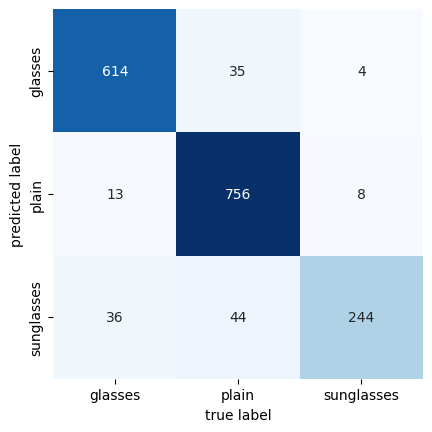

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

<p>Model 3: In this model we will attempt to improved accuracy on sunglasses using the class_weight property of the SVM model</p>

<p>First we need to calculation weights for each class</p>

In [72]:
combined_sum = sum (combined_size) 
#float(combined_sum)
combined_sum

7013

In [73]:
entries = len(combined_size)
entries

3

In [74]:
class_weights=[]
for i, size in enumerate(combined_size):
    class_weights.append( str(combined_sum / (entries * size)))
class_weights

['0.8828046324269889', '0.7090284096653523', '2.1888264669163546']

In [75]:
#Apparently, it must be a  dict
class_weights_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]} 
class_weights_dict[0]

'0.8828046324269889'

<p>Then add the class weights to model</p>

In [76]:
pca = PCA(n_components=150, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight=class_weights_dict)
model = make_pipeline(pca, svc)

In [77]:
model.fit(X_train,y_train)

Pipeline(steps=[('pca',
                 PCA(n_components=150, random_state=42, svd_solver='randomized',
                     whiten=True)),
                ('svc',
                 SVC(class_weight={0: '0.8828046324269889',
                                   1: '0.7090284096653523',
                                   2: '2.1888264669163546'}))])

<p>Adding weights to the class did not change the results at all which was a surprising result</p>

In [78]:
y_pred = model.predict(X_test)
from  sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     glasses       0.94      0.93      0.93       663
       plain       0.97      0.91      0.94       835
  sunglasses       0.75      0.95      0.84       256

    accuracy                           0.92      1754
   macro avg       0.89      0.93      0.90      1754
weighted avg       0.93      0.92      0.92      1754



Text(113.9222222222222, 0.5, 'predicted label')

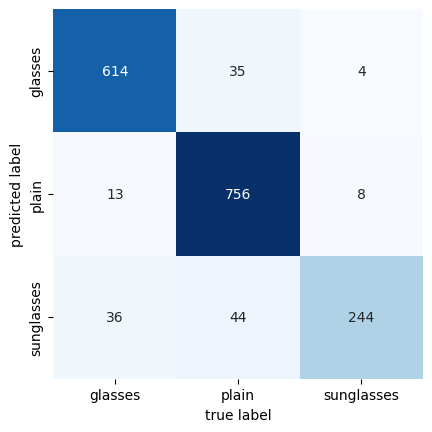

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

<p>Model 4</p>

<p>Create a function to make a new set of training data with equal numbers for each class</p>

In [103]:
files_folder = [[len(os.listdir(os.path.join(FOLDER, folder))),folder] for folder in folders]
min(files_folder)[1]
min(files_folder)[0]

1068

In [104]:
img = os.listdir(os.path.join(FOLDER, 'glasses'))[0]
img

'%c3%96sterreichischer_filmpreis_2019_foto_call_markus_schleinzer_1.jpg'

In [9]:
def create_training_data_equalised(FOLDER, folders):
    training_data = []
    
    # Get max number of files
    files_folder = [[len(os.listdir(os.path.join(FOLDER, folder))),folder] for folder in folders]
    max_files_path = os.path.join(FOLDER, min(files_folder)[1])
    max_files_count = min(files_folder)[0]
    
    # Transfer max number of files
    for folder in folders:
        for i in range(0,max_files_count-1):
            try:
                path = os.path.join(FOLDER, folder)
                img = os.listdir(path)[i]
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (256, 256))
                class_num = folders.index(folder)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data


In [10]:
equalised_data = create_training_data_equalised(FOLDER, folders)

<p>Check if classes are now equal</p>

In [116]:
listClasses = []
from collections import Counter
for data in equalised_data:
    listClasses.append(data[1])
Counter(listClasses)

Counter({0: 1067, 1: 1067, 2: 1067})

In [11]:
X1 = []
y1 = []

for features,label in equalised_data:
    X1.append(features)
    y1.append(label)
    
X1 = np.array(X1)
y1 = np.array(y1)

In [12]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,random_state=0)

In [13]:
# Flatten images
X1_test = X1_test.reshape(X1_test.shape[0],-1)
X1_test.shape

(801, 196608)

In [14]:
X1_train = X1_train.reshape(X1_train.shape[0],-1)
X1_train.shape

(2400, 196608)

In [121]:
#Set components to 150
pca = PCA(n_components=150, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

<p> Evaluating oure results we see a small drop in accuracy for plain and sunglasses but a big jump in accuracy for sunglasses class. This suggest that the poor results for sunglasses was related to the imbalanced dataset</p>

In [123]:
model.fit(X1_train,y1_train)
y1_pred = model.predict(X1_test)
from  sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred, target_names=labels))

              precision    recall  f1-score   support

     glasses       0.91      0.92      0.91       276
       plain       0.94      0.80      0.86       246
  sunglasses       0.85      0.96      0.90       279

    accuracy                           0.89       801
   macro avg       0.90      0.89      0.89       801
weighted avg       0.90      0.89      0.89       801



Text(113.9222222222222, 0.5, 'predicted label')

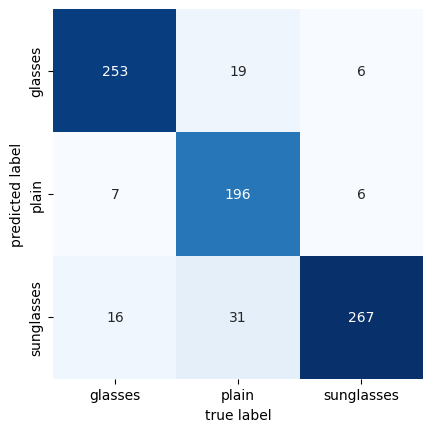

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y1_test, y1_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

<p>Model 5<br>For this model we will try to tune the hyperparameters for the Support Vector Machine.<br>There are two parameters we can look at:<br>
C: which controls margin hardness (the tradeoff between maximum margin and minimum classification error) <br>
Gamma: This is how far from the margin the algorithm considers points, f</p>

CPU times: total: 8h 33min 32s
Wall time: 1h 11min 6s
{'svc__C': 5, 'svc__gamma': 0.005}

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X1_train, y1_train)
print(grid.best_params_)

CPU times: total: 8h 33min 32s
Wall time: 1h 11min 6s
{'svc__C': 5, 'svc__gamma': 0.005}


In [ ]:
model = grid.best_estimator_
y_pred = model.predict(X_test)

In [126]:
model = grid.best_estimator_
y1_pred = model.predict(X1_test)
print(classification_report(y1_test, y1_pred, target_names=labels))

              precision    recall  f1-score   support

     glasses       0.91      0.91      0.91       276
       plain       0.91      0.83      0.87       246
  sunglasses       0.87      0.94      0.91       279

    accuracy                           0.90       801
   macro avg       0.90      0.89      0.89       801
weighted avg       0.90      0.90      0.89       801



<p>The next change is to further tune the n_components and C parameters. This was done manually due to the computation time needed for cross validation on this large dataset </p>

In [15]:
pca = PCA(n_components=75, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced',C=7.5,gamma=0.005)
model = make_pipeline(pca, svc)
model.fit(X1_train,y1_train)
y1_pred = model.predict(X1_test)
print(classification_report(y1_test, y1_pred, target_names=labels))

              precision    recall  f1-score   support

     glasses       0.90      0.95      0.92       276
       plain       0.93      0.84      0.88       246
  sunglasses       0.90      0.93      0.91       279

    accuracy                           0.91       801
   macro avg       0.91      0.90      0.91       801
weighted avg       0.91      0.91      0.91       801

